# Autoencoder analysis

This notebook shows how to load and run a trained conditional autoencoder network using the `analysis.py` helper module.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from analysis import load_model, load_testdataset, plot_result

In [2]:
# Load model and dataset
model, c_dict = load_model("fault_cae", verbose=False)
d = load_testdataset("fault_2ms_r_validate.bin", N_EXAMPLES=3000, c_dict=c_dict, verbose=False)
#for k in c_dict: print("%s: %s"%(k, c_dict[k]))

Loading model from: server/models/fault_cae/model_03000000.torch
3000 examples
[   0    1    2 ... 2997 2998 2999]


In [3]:
# Get batches of test data
irange = np.arange(10)

d.open_file_reader()
samples = [d[i] for i in irange]
d.close_file_reader()
inputs = [torch.cat([sample["inputs"][i].unsqueeze(0) for sample in samples]) for i in range(len(samples[0]["inputs"]))]
labels = [torch.cat([sample["labels"][i].unsqueeze(0) for sample in samples]) for i in range(len(samples[0]["labels"]))]
for i in inputs: print(i.shape)
for i in labels: print(i.shape)

torch.Size([10, 1, 128, 128])
torch.Size([10, 2, 1, 1])
torch.Size([10, 1, 32, 512])


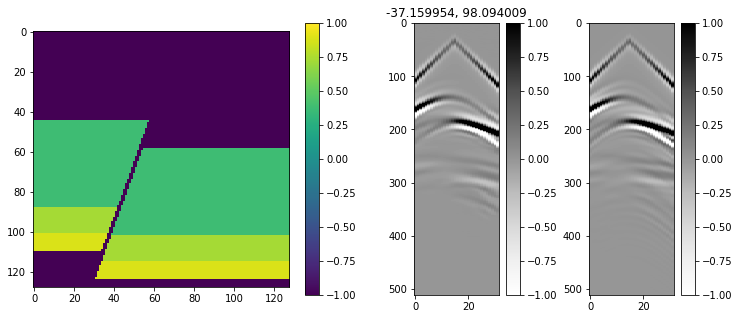

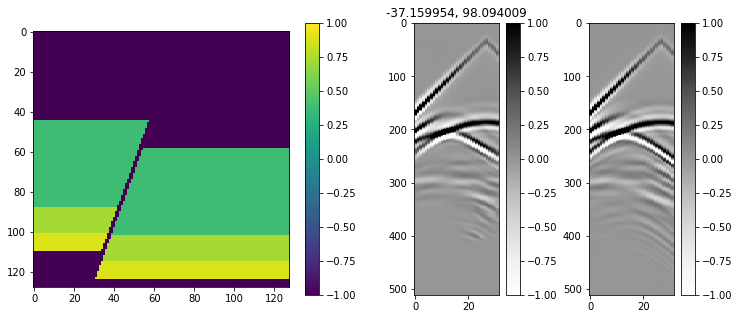

In [4]:
# Inference
with torch.no_grad():# faster inference without tracking
    model.eval()
    outputs = model(*inputs)

    inputs_array = inputs[0].detach().cpu().numpy().copy()# detach returns a new tensor, detached from the current graph
    outputs_array = outputs[0].detach().cpu().numpy().copy()
    labels_array = labels[0].detach().cpu().numpy().copy()

    
plot_result(inputs_array, outputs_array, labels_array, sample_batch=None, ib=0, isource=0,
                aspect=0.2, T_GAIN=2.5)

plot_result(inputs_array, outputs_array, labels_array, sample_batch=None, ib=1, isource=0,
                aspect=0.2, T_GAIN=2.5)

plt.show()

In [5]:
print(model)

AE_r(
  (conv1a): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1a_bn): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop1a): Dropout2d(p=0.0, inplace=False)
  (conv1): Conv2d(8, 16, kernel_size=(2, 2), stride=(2, 2))
  (conv1_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop1): Dropout2d(p=0.0, inplace=False)
  (conv2a): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2a_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop2a): Dropout2d(p=0.0, inplace=False)
  (conv2): Conv2d(16, 32, kernel_size=(2, 2), stride=(2, 2))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop2): Dropout2d(p=0.0, inplace=False)
  (conv3a): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3a_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [6]:
print(sum(p.numel() for p in model.parameters() if p.requires_grad))

18382296
